# Examples clustering

In [1]:
import numpy as np
from igraph import Graph, ADJ_MAX
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adj = np.load('./matrices', allow_pickle=True)
centers = np.load('./node_centers', allow_pickle=True)

In [3]:
for a in adj:
    np.fill_diagonal(a, 0)

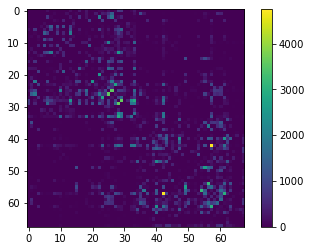

In [4]:
plt.imshow(adj[0])
plt.colorbar()

In [5]:
a = adj[-1]

In [6]:
a

array([[  0.,   1.,   1., ...,   0.,   2.,  29.],
       [  1.,   0., 138., ...,   0.,   0.,   2.],
       [  1., 138.,   0., ...,   0.,   0.,   1.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 184.],
       [  2.,   0.,   0., ...,   0.,   0., 133.],
       [ 29.,   2.,   1., ..., 184., 133.,   0.]])

In [7]:
g0 = Graph.Weighted_Adjacency(
            a.tolist(), mode=ADJ_MAX, attr='weight')

In [8]:
clustering = g0.community_multilevel(weights='weight')

In [9]:
clustering.modularity

0.3717105892323912

In [10]:
colors = clustering.membership

In [11]:
np.array(colors)

array([0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2,
       1, 2, 1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 3, 2, 3, 1, 2,
       2, 2])

In [12]:
centers.shape

(807, 68, 3)

In [13]:
xy = centers.mean(axis=0)[:, :2]

In [14]:
xy.shape

(68, 2)

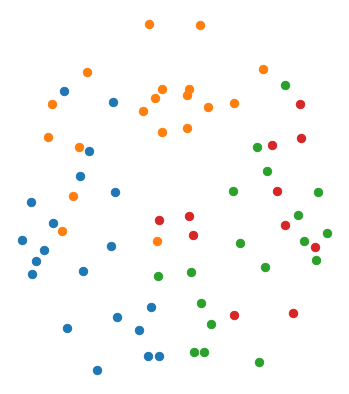

In [15]:
plt.figure(figsize=(6, 7))
for c in np.unique(colors):
    plt.scatter(xy[colors==c, 0], xy[colors==c, 1],  s=70, alpha=1, cmap='Set1')

plt.axis('off');

In [16]:
g0 = Graph.Weighted_Adjacency(
            adj[50].tolist(), mode=ADJ_MAX, attr='weight')

In [17]:
clustering_multilevel = g0.community_multilevel(weights='weight')
clustering_leiden = g0.community_leiden(weights='weight')
clustering_btw = g0.community_edge_betweenness(weights='weight').as_clustering()
clustering_greedy = g0.community_fastgreedy(weights='weight').as_clustering()

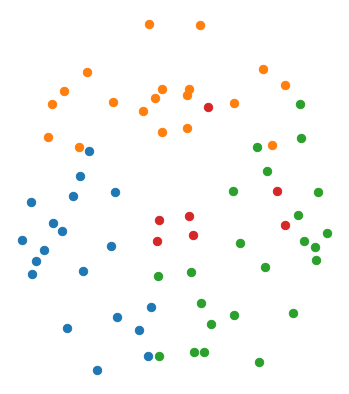

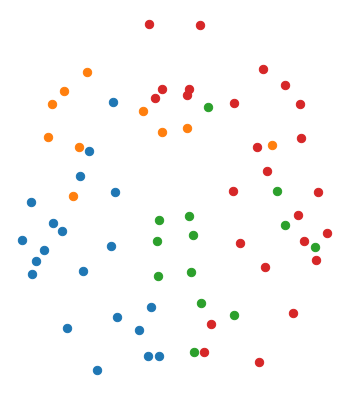

In [18]:
for c in [clustering_multilevel, clustering_greedy]: # clustering_leiden, clustering_btw, 
    colors = c.membership
    plt.figure(figsize=(6, 7))
    for c in np.unique(colors):
        plt.scatter(xy[colors==c, 0], xy[colors==c, 1],  s=70, alpha=1, cmap='Set1')

    plt.axis('off');

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
c = confusion_matrix(clustering_multilevel.membership, clustering_greedy.membership)

In [21]:
c_ = c.copy()

In [22]:
c[:, 2], c[:, 3] = c_[:, 3], c_[:, 2]

In [23]:
c

array([[18,  1,  0,  0],
       [ 1,  9,  9,  0],
       [ 1,  0, 16,  6],
       [ 0,  0,  0,  7]])

In [24]:
adjusted_rand_score(clustering_multilevel.membership, clustering_greedy.membership)

0.4796507220048854

In [25]:
# from community import best_partition

In [26]:
a = adj[150]

In [27]:
np.quantile(a.flatten(), .90)

412.0

In [28]:
a[a<297] = 0

In [29]:
g0 = Graph.Weighted_Adjacency(
            a.tolist(), mode=ADJ_MAX, attr='weight')

In [30]:
clustering_multilevel = []
for i in range(100):
    clustering_multilevel.append(g0.community_multilevel(weights='weight').membership)

In [31]:
for i in range(100):
    for j in range(i, 100):
        print(adjusted_rand_score(clustering_multilevel[i], clustering_multilevel[j]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# NOT Clustering

# Epidemics and information spreading

## SIR - susceptible; infected; recovered

## SIS - susceptible; infected; susceptible

## SIRS - susceptible; infected; recovered; susceptible

http://www.leonidzhukov.net/hse/2015/socialnetworks/lectures/lecture7.pdf

# Random Walk, Word2Vec, Node2Vec

http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf